In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jjoo = pd.read_csv("athlete_events.csv.zip")
jjoo

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
jjoo.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
#Para tratar los nulos de los medallas, simplement asigno No Medal ("NoM") en lugar de NaN
jjoo["Medal"] = jjoo["Medal"].fillna("NoM")

In [6]:
#Para los nulos de edad, altura y peso, sustuiremos la mediana por sexo, ya que son variables secundarias.

jjoo["Height"] = jjoo.groupby(["Sex"])['Height'].transform(lambda x: x.fillna(x.median()))
jjoo["Age"] = jjoo.groupby(["Sex"])['Age'].transform(lambda x: x.fillna(x.median()))
jjoo["Weight"] = jjoo.groupby(["Sex"])['Weight'].transform(lambda x: x.fillna(x.median()))

In [7]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
#Consultando las columnas observamos que para cada NOC (Comíté Olímpico Nacional) le corresponden diferentes equipos. Vamos a analizarlos bien, para que así a cada atleta le coresponda simplemente el nombre de su país
jjoo.groupby("NOC")["Team"].nunique().sort_values(ascending=False).head(10)

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
GER     43
ITA     36
CAN     32
DEN     29
GRE     29
Name: Team, dtype: int64

In [9]:
# Efectivamente para cada NOC le corresponden diferentes equipos. Vamos a utilizar el otro dataset de la entrada principal, que relaciona NOCs con países 

In [10]:
noc = pd.read_csv('noc_regions.csv')
noc = noc.drop("notes", axis = 1)
noc = noc.rename(columns = {"region": "Country"})

In [11]:
#Uno los dos datasets a través de la columna NOC para que aparezca la columna Country en nuestro dataset principal
#El join es left porque queremos todos los países participantes, tengan NOC o no asociado

jjoo_merge = jjoo.merge(noc, left_on = "NOC", right_on = "NOC", how = "left")

In [12]:
#Por consenso colectivo, nos vamos a quedar con los eventos de verano
jjoo = jjoo_merge[jjoo_merge["Season"] == "Summer"]

In [13]:
#Les asigno país manualmente

jjoo.loc[jjoo['NOC']=='SGP', "Country"] = "Singapore"
jjoo.loc[jjoo['NOC']=='ROT', "Country"] = "Refugee Olympic Athletes"
jjoo.loc[jjoo['NOC']=='UNK', "Country"] = "Unknown"
jjoo.loc[jjoo['NOC']=='TUV', "Country"] = "Tuvalu"

In [14]:
#Elimamos la columna de Team, para quedarnos con Country
jjoo = jjoo.drop(["Team"], axis = 1)

In [15]:
#Vamos a explorar qué países tienen más medallas.
#Para simplificarnos la vida, vamos a hacer una columna que indique si el atleta tiene o medalla o no, independientemente del metal

jjoo["Has_Medal"] = "0"
jjoo.loc[jjoo["Medal"] != "NoM", "Has_Medal"] = 1

In [16]:
#Podemos comprovar que las medallas estan asignadas por atletas. Como en los medalleros se cuenta 1 medalla por deporte de equipo, primero tenemos que encontrar los deportes de equipo y asignarles solo una medalla.
jjoo.loc[(jjoo.Sport == "Handball") & (jjoo["Medal"] == "Gold") & (jjoo.Year == 2016) & (jjoo.Sex == "M")]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal
41295,21299,Mads Christiansen,M,30.0,197.0,93.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90256,45732,Henrik Toft Hansen,M,29.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90337,45782,Mikkel Hansen,M,28.0,196.0,98.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90361,45793,Ren Toft Hansen,M,31.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
107590,54379,Henrik Mllgaard Jensen,M,31.0,197.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
126854,63955,Jannick Green Krejberg,M,27.0,195.0,95.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
131775,66315,Niklas Landin Jacobsen,M,27.0,201.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
132743,66820,Mads Mensah Larsen,M,24.0,188.0,106.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
164022,82327,Casper Ulrich Mortensen,M,26.0,190.0,88.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
171165,86018,Michael Damgaard Nielsen,M,26.0,192.0,92.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1


In [17]:
#Suma medallas por evento
medal_sum = jjoo.groupby(["Country","Year","Event","Medal"], as_index = False)["Has_Medal"].sum()

#Contar solo las medallas de oro (dando por supuesto que en los eventos de equipo también habrá múltiples de otro metal)
gold_medals = medal_sum[medal_sum['Medal'] == 'Gold']

#Buscar eventos con múltiples medallas de oro (por equipo o por múltiple premio)
identify_team_events = gold_medals[gold_medals['Has_Medal'] > 1]

identify_team_events

,Country,Year,Event,Medal,Has_Medal
824,Argentina,1924,Polo Men's Polo,Gold,5
930,Argentina,1936,Polo Men's Polo,Gold,4
1091,Argentina,1952,Rowing Men's Double Sculls,Gold,2
1858,Argentina,2004,Basketball Men's Basketball,Gold,12
1871,Argentina,2004,Football Men's Football,Gold,16
...,...,...,...,...,...
101892,Ukraine,2008,"Fencing Women's Sabre, Team",Gold,4
102113,Ukraine,2012,Rowing Women's Quadruple Sculls,Gold,4
102422,Uruguay,1924,Football Men's Football,Gold,14
102423,Uruguay,1928,Football Men's Football,Gold,17


In [18]:
# Si un evento coincide con un deporte de equipo, entonces es un evento de equipo. Los otros son eventos individuales.
team_event = []
single_event = []

for event in jjoo["Event"]:
    if event is identify_team_events:
        team_event.append(True)
        single_event.append(False)
    else:
        team_event.append(False)
        single_event.append(True)

# Filas en que hay 1 oro
medal = jjoo['Has_Medal'] == 1

# Inicializar columnas
jjoo['Team_Event'] = 0
jjoo['Single_Event'] = 0

#Asignar 1 a eventos de equipo con medalla
jjoo.loc[team_event & medal, "Team_Event"] = 1

#Categoría final
jjoo['Event_Category'] = jjoo['Single_Event'] + jjoo['Team_Event']

C:\Users\User\AppData\Local\Temp\ipykernel_36228\1550428214.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  jjoo.loc[team_event & medal, "Team_Event"] = 1


In [19]:
#Ahora contamos una medalla por evento, o sea que tenemos que dividir el número de medallas por el total de miembros del equipo ganador.
#Se filtran columnas con medalla, se agrupan columnas de interés, se agregan cuántos atletas ganaros esta medalla y max devuelve si al menos uno es evento de equipo

medals_tally = jjoo[jjoo["Has_Medal"] == 1].groupby(["Year", "Country", "Event", "Medal"]).agg(atletas=("Has_Medal","sum"),Team_Event=("Team_Event","max")).reset_index()
medals_tally['Medal_corrected'] = 1
medals_tally

,Year,Country,Event,Medal,atletas,Team_Event,Medal_corrected
0,1896,Australia,"Athletics Men's 1,500 metres",Gold,1,0,1
1,1896,Australia,Athletics Men's 800 metres,Gold,1,0,1
2,1896,Australia,Tennis Men's Doubles,Bronze,1,0,1
3,1896,Austria,"Cycling Men's 10,000 metres",Bronze,1,0,1
4,1896,Austria,Cycling Men's 12-Hours Race,Gold,1,0,1
...,...,...,...,...,...,...,...
16047,2016,Venezuela,Athletics Women's Triple Jump,Silver,1,0,1
16048,2016,Venezuela,Boxing Men's Flyweight,Bronze,1,0,1
16049,2016,Venezuela,Cycling Women's BMX,Bronze,1,0,1
16050,2016,Vietnam,"Shooting Men's Air Pistol, 10 metres",Gold,1,0,1


In [21]:
#Finalmente podemos sumar las medallas por país y filtrar el top 10
medals_total = medals_tally.groupby(["Country"])["Medal_corrected"].sum()

medals_top = medals_total.sort_values(ascending=False).iloc[0:10]
medals_top

Country
USA          2544
Russia       1577
Germany      1389
UK            892
France        770
Italy         608
China         545
Australia     518
Sweden        513
Hungary       504
Name: Medal_corrected, dtype: int64

In [22]:
#Para graficar la evolución temporal del medallero, seleccionamos los país que nos interesan
top_countries = ["USA","Russia","Germany","UK","France","Italy","China"]

#Unstack nos permite separar los países por columnas y asignarles las medallas por año
year_country = medals_tally.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)

#Filtramos sólo los países seleciconados
year_country = year_country.loc[:, top_countries]

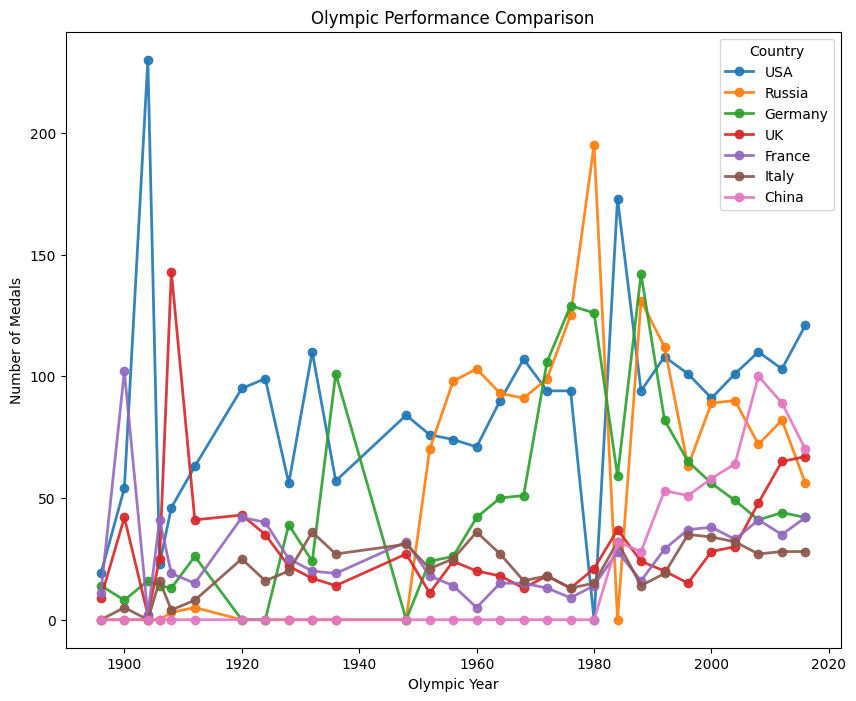

In [23]:
year_country.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison');

## Análisis URRS y Rusia

### Análisis de la URRS

#### Distribución de medallas conseguidas por la URS

In [ ]:
#Filtro DESDE CERO sin sobrescribir
urss_data = medals_tally[medals_tally["NOC"] == "URS"].copy()  # ← .copy() importante

#NUEVA variable para los años filtrados
urss_1952_1988 = urss_data[urss_data["Year"] <= 1988]

# Verificar
print(f"urss_data total: {urss_data.shape[0]}")  # Debería ser 1577
print(f"urss_1952_1988: {urss_1952_1988.shape[0]}")  # Debería ser menos

# Contar medallas
medallas_por_año = urss_1952_1988[urss_1952_1988["Medal"] != "NoM"].groupby("Year").size()
print(medallas_por_año)

urss_data total: 1577
urss_1952_1988: 1013
Year
1908      3
1912      5
1952     70
1956     98
1960    103
1964     93
1968     91
1972     99
1976    125
1980    195
1988    131
dtype: int64


In [109]:
urss_data = urss_1952_1988
urss_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 1357 to 15539
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1013 non-null   int64 
 1   Country          1013 non-null   object
 2   Event            1013 non-null   object
 3   Medal            1013 non-null   object
 4   atletas          1013 non-null   object
 5   Team_Event       1013 non-null   int64 
 6   Medal_corrected  1013 non-null   int64 
 7   NOC              1013 non-null   object
dtypes: int64(3), object(5)
memory usage: 71.2+ KB


In [121]:
#Tambien rescataremos la columna sport del dataset original
sport_mapping = jjoo[["Event", "Sport"]].drop_duplicates()
urss_data = urss_data.merge(sport_mapping, on="Event", how="left")

# Verificar que ahora sí tiene Sport
print(urss_data.columns)

Index(['Year', 'Country', 'Event', 'Medal', 'atletas', 'Team_Event',
       'Medal_corrected', 'NOC', 'Sport_x', 'Sport_y'],
      dtype='object')


In [122]:
#Importo las herramientas del bootcamp para el análisis
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms
urss_data.groupby("Event", as_index = False)["Medal"].value_counts(normalize = True)



,Event,Medal,proportion
0,Archery Men's Individual,Bronze,0.500000
1,Archery Men's Individual,Silver,0.500000
2,Archery Women's Individual,Bronze,0.400000
3,Archery Women's Individual,Silver,0.400000
4,Archery Women's Individual,Gold,0.200000
...,...,...,...
465,"Wrestling Men's Super-Heavyweight, Greco-Roman",Gold,1.000000
466,"Wrestling Men's Welterweight, Freestyle",Silver,0.666667
467,"Wrestling Men's Welterweight, Freestyle",Bronze,0.333333
468,"Wrestling Men's Welterweight, Greco-Roman",Silver,0.600000


### Visualización específica de deportes con más medallas

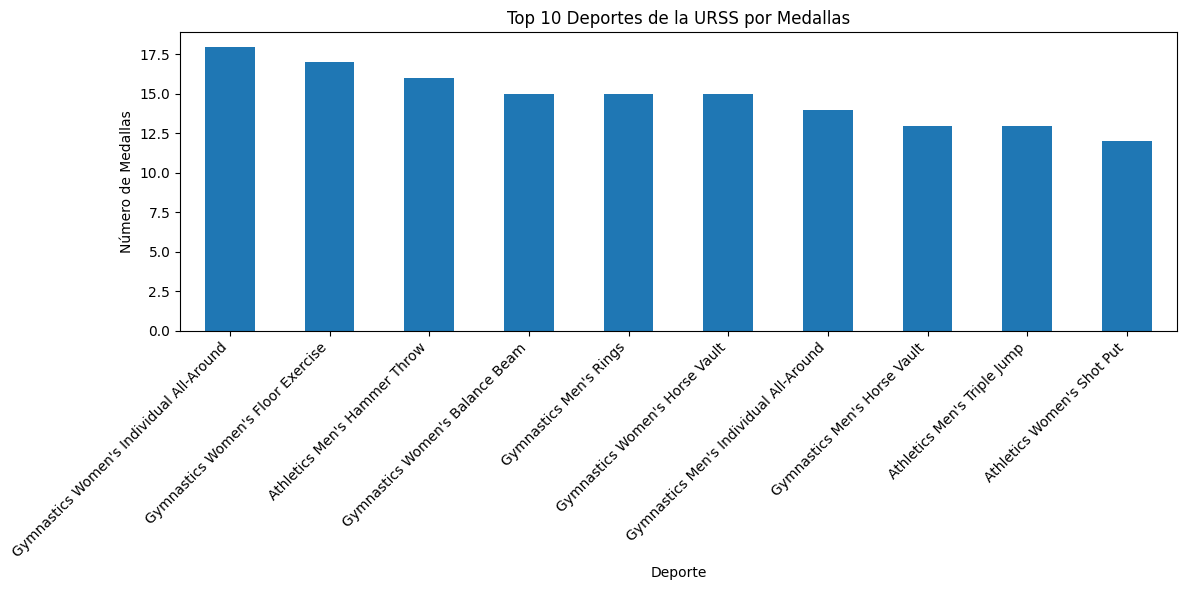

In [125]:
# Contar medallas por deporte (separando por tipo)
medallas_por_deporte = urss_data.groupby("Event").size().sort_values(ascending=False)

# Top 10 deportes con más medallas
top_10_deportes = medallas_por_deporte.head(10)

# Graficar
plt.figure(figsize=(12, 6))
top_10_deportes.plot(kind='bar')
plt.title("Top 10 Deportes de la URSS por Medallas")
plt.xlabel("Deporte")
plt.ylabel("Número de Medallas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Este gráfico confirma:

La URSS era una superpotencia en gimnasia femenina: dominio histórico sin precedentes

Larisa Latynina es una de las atletas olímpicas más grandes de TODOS LOS TIEMPOS (no solo gimnasia)

El sistema deportivo soviético funcionaba - inversión estatal masiva + detección temprana de talentos = éxito sostenido

La gimnasia era propaganda política - cada medalla demostraba la "superioridad del sistema socialista"

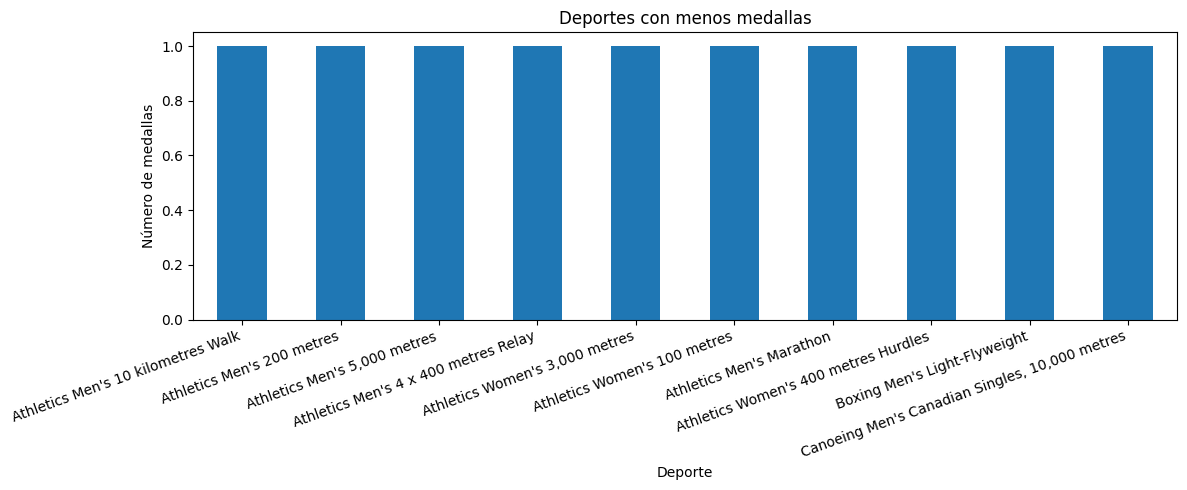

In [114]:
medallas_por_deporte = urss_data.groupby("Event").size().sort_values(ascending=True)
peores_deportes = medallas_por_deporte.head(10)
plt.figure(figsize=(12,5))
peores_deportes.plot(kind = "bar")
plt.title("Deportes con menos medallas")
plt.xlabel("Deporte")
plt.ylabel("Número de medallas")
plt.xticks(rotation = 20, ha = "right")
plt.tight_layout()
plt.show()

### Conclusiones

1. Deportes incorporados TARDÍAMENTE (1984):

Rhythmic Gymnastics (Gimnasia Rítmica): Se convirtió en deporte olímpico oficial en Los Ángeles 1984
Synchronized Swimming (Natación Sincronizada): Se convirtió en deporte olímpico oficial en Los Ángeles 1984

Contexto crítico: La URSS solo tuvo UNA OPORTUNIDAD (1984 y 1988) para competir en estos deportes antes de disolverse en 1991. Por eso solo tienen 1 medalla.
Dato interesante verificado: En 1980, cuando la votación para incluir synchronized swimming en los Juegos Olímpicos llegó al Comité Olímpico en Moscú, la URSS votó EN CONTRA porque Estados Unidos dominaba ese deporte en los años 70 y no querían darles ventaja.

2. Deportes con POCOS EVENTOS disponibles:

Athletics Men's 10 kilometres Walk, 5,000m, 200m, 3,000m, etc.: Son eventos individuales y específicos dentro de Athletics
Cada uno representa UNA SOLA carrera en toda la historia olímpica de la URSS
Contrasta con deportes como Swimming o Gymnastics que tienen decenas de eventos diferentes


3. NO son realmente los "peores" deportes:
Este gráfico es engañoso sin contexto porque:

Menos medallas ≠ Peor rendimiento
Simplemente son deportes donde había menos oportunidades de ganar medallas
Algunos ni siquiera existían durante la mayor parte de la existencia de la URSS

In [117]:
#Para hacer un análisis menos engañoso, filtraremos los deportes con más participaciones de la Urss y lo commpararemos con las medallas conseguidas
años_por_deporte = urss_data.groupby("Event")["Year"].nunique()
medallas_por_deporte = urss_data.groupby("Event").size()
medallas_promedio = medallas_por_deporte/años_por_deporte
peores = medallas_promedio.sort_values(ascending = True)
print("Los verdaderos peores deportes para la URSS son : ", peores)

Los verdaderos peores deportes para la URSS son :  Event
Archery Men's Individual                                 1.0
Athletics Men's 10 kilometres Walk                       1.0
Athletics Men's 10,000 metres                            1.0
Athletics Men's 100 metres                               1.0
Athletics Men's 200 metres                               1.0
                                                        ... 
Shooting Men's Running Target, Single And Double Shot    2.0
Rhythmic Gymnastics Women's Individual                   2.0
Shooting Women's Air Rifle, 10 metres                    2.0
Swimming Men's 400 metres Freestyle                      2.0
Athletics Women's Pentathlon                             2.5
Length: 226, dtype: float64


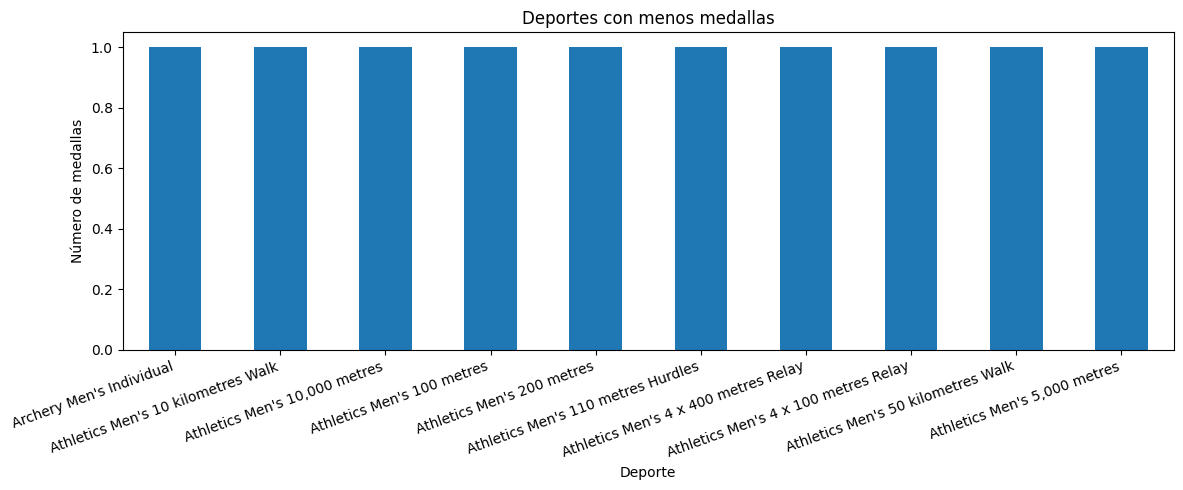

In [123]:
peores = peores.head(10)
plt.figure(figsize=(12,5))
peores.plot(kind = "bar")
plt.title("Deportes con menos medallas")
plt.xlabel("Deporte")
plt.ylabel("Número de medallas")
plt.xticks(rotation = 20, ha = "right")
plt.tight_layout()
plt.show()

### Conclusiones



1. ARCHERY (Tiro con Arco) - EL VERDADERO "PEOR" DEPORTE DE LA URSS
Datos verificados:

El tiro con arco fue reintroducido en los Juegos Olímpicos en 1972 después de una ausencia de 52 años (desde 1920)
La URSS solo tuvo 4 oportunidades para competir: 1972, 1976, 1980, 1988
Estados Unidos dominó completamente desde 1972-1984, ganando TODAS las medallas de oro individuales

Contexto histórico crucial:

En 1980 (Moscú), EE.UU. boicoteó los Juegos, así que no compitieron
Esa fue la ÚNICA olimpiada donde la URSS ganó sus primeras medallas de tiro con arco (porque no estaba EE.UU.)
Desde 1984 en adelante, Corea del Sur comenzó su dominio absoluto

Conclusión: La URSS era genuinamente débil en tiro con arco - solo ganaban cuando EE.UU. no participaba, y nunca desarrollaron un programa competitivo fuerte.

2. ATHLETICS (Eventos específicos con 1.0 de promedio)
Por qué aparecen:

Son eventos individuales muy específicos dentro del Athletics
"Men's 10 kilometres Walk", "Men's 5,000 metres", etc.
La URSS participó 1 año en cada uno y ganó 1 medalla
1 medalla / 1 año = 1.0 promedio

Esto NO significa que fueran malos:

Simplemente son eventos donde participaron poco
El promedio 1.0 indica que cuando participaron, ganaron medalla
No es bajo rendimiento, es poca frecuencia


3. SWIMMING Y SHOOTING EVENTS
Por qué 2.0-2.5 de promedio:

Son eventos individuales dentro de Swimming/Shooting
La URSS participó 2-4 años en cada uno
Ganaron 4-10 medallas totales
Promedio de ~2 medallas por año

Comparación:

En deportes donde eran fuertes (Gymnastics), el promedio era 15-17 medallas por año
2 medallas/año es objetivamente bajo para una superpotencia deportiva

### Visualización general de deportes con más medallas

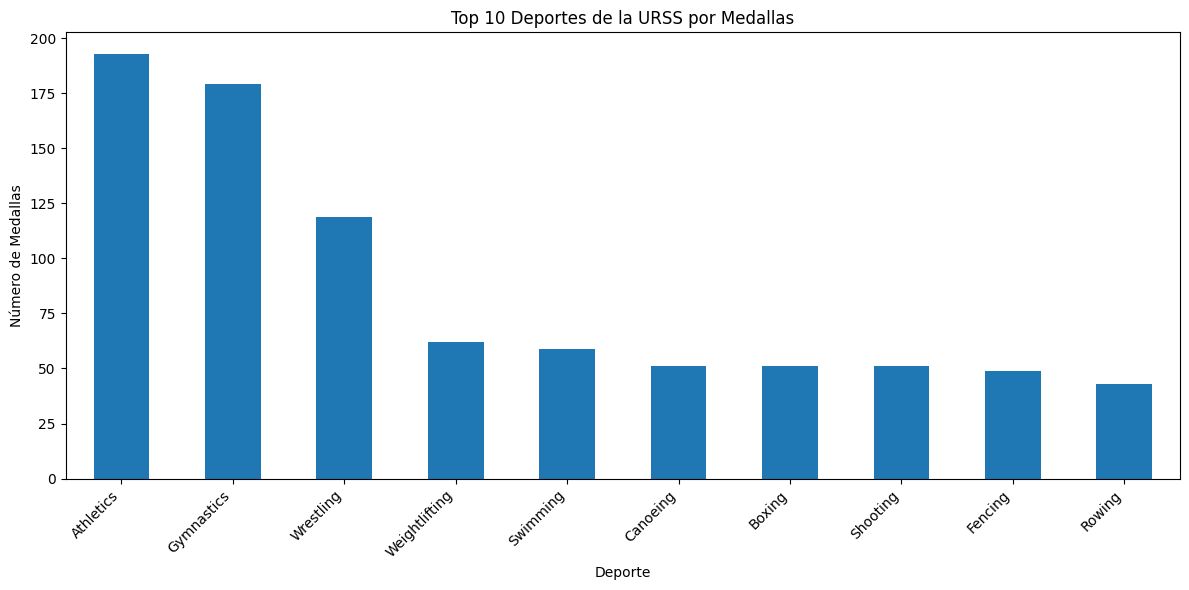

In [130]:
# Contar medallas por deporte (sin separar por tipo)
medallas_por_deporte = urss_data.groupby("Sport_x").size().sort_values(ascending=False)

# Top 10 deportes con más medallas
top_10_deportes = medallas_por_deporte.head(10)

# Graficar
plt.figure(figsize=(12, 6))
top_10_deportes.plot(kind='bar')
plt.title("Top 10 Deportes de la URSS por Medallas")
plt.xlabel("Deporte")
plt.ylabel("Número de Medallas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

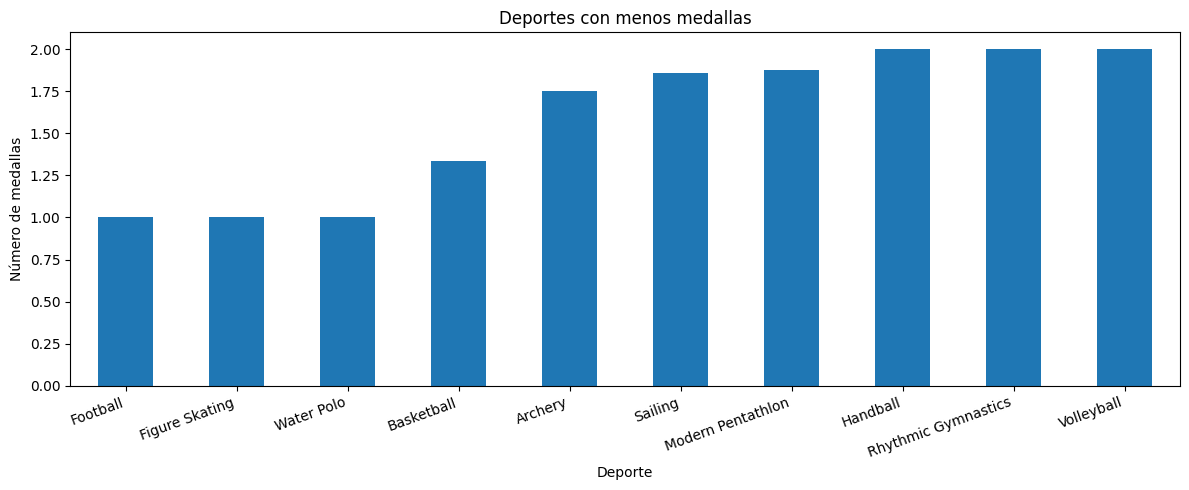

In [132]:
años_por_deporte = urss_data.groupby("Sport_x")["Year"].nunique()
medallas_por_deporte = urss_data.groupby("Sport_x").size()
medallas_promedio = medallas_por_deporte/años_por_deporte
peores = medallas_promedio.sort_values(ascending = True)
peores = peores.head(10)
plt.figure(figsize=(12,5))
peores.plot(kind = "bar")
plt.title("Deportes con menos medallas")
plt.xlabel("Deporte")
plt.ylabel("Número de medallas")
plt.xticks(rotation = 20, ha = "right")
plt.tight_layout()
plt.show()

Los deportes de equipo siempre se le han dado especialmente mal a la Unión Soviética

### Evolución de medallas por año

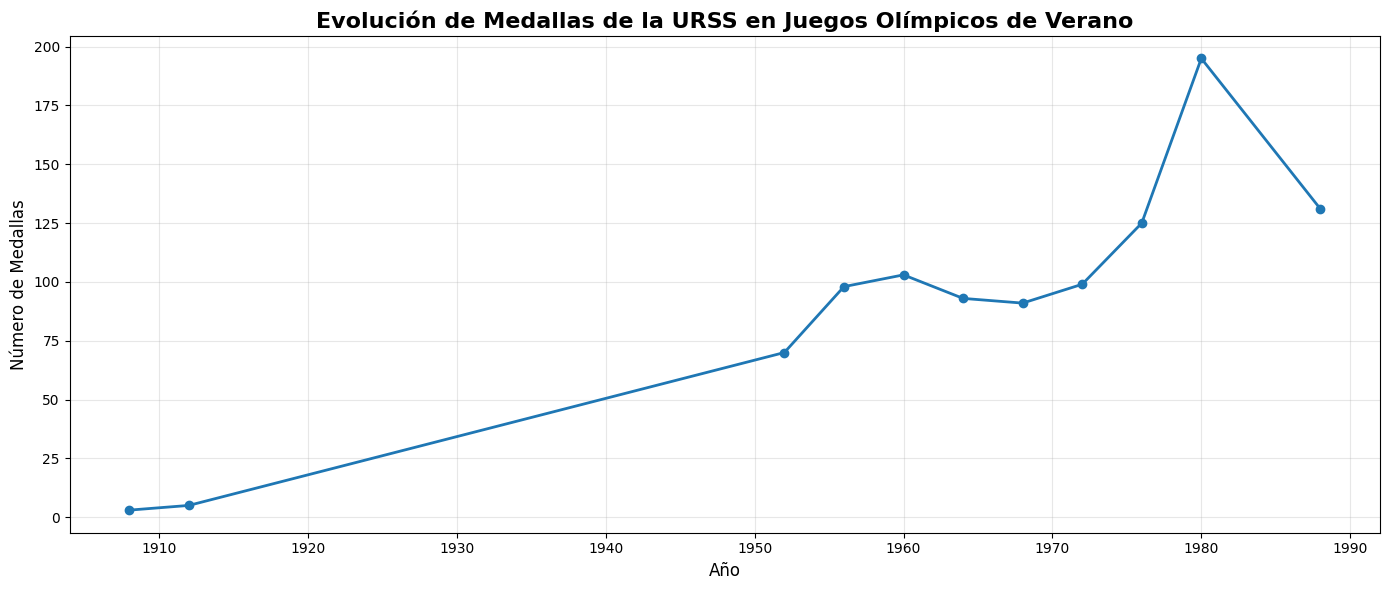

In [133]:
urss_medallas = urss_data.loc[urss_data['Medal'] != 'No Medal']

# Contar medallas por año
medallas_por_año = urss_medallas.groupby('Year').size()

# Gráfico de línea
plt.figure(figsize=(14, 6))
plt.plot(medallas_por_año.index, medallas_por_año.values, marker='o', linewidth=2, markersize=6)
plt.title('Evolución de Medallas de la URSS en Juegos Olímpicos de Verano', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Medallas', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### CONCLUSIONES: EVOLUCIÓN DE MEDALLAS DE LA URSS (1908-1990)

1. EL PICO DE 1980 - VENTAJA ARTIFICIAL
195 medallas en Moscú 1980 - El máximo histórico de la URSS
Factores que inflaron este número:

Sede local (ventaja del anfitrión)
Boicot masivo de 67 países liderado por EE.UU. por la invasión soviética de Afganistán
Solo 80 países participaron (el número más bajo desde 1956)
EE.UU., Alemania Occidental, Japón, Canadá y otras potencias ausentes
La URSS y Alemania del Este ganaron 127 de 203 oros (62% del total)

Resultado: Competencia artificialmente débil - muchos récords y tiempos decepcionantes por ausencia de rivales de élite.

2. CRECIMIENTO SOSTENIDO (1952-1976)
De ~70 a ~125 medallas en 24 años
Causas verificadas:

Sistema deportivo estatal profesional (atletas entrenaban tiempo completo disfrazados de "amateurs")
Inversión masiva en infraestructura y detección temprana de talentos
Dominio establecido en gimnasia, atletismo, lucha, levantamiento de pesas

Este crecimiento SÍ refleja mejora real del programa deportivo soviético.

3. CAÍDA POST-1980 (1988: ~131 medallas)
Por qué bajó:

Competencia normalizada - rivales occidentales regresaron
1984: La URSS boicoteó Los Ángeles en represalia (no aparece en tu gráfico)
1988: Última participación antes de la disolución, competencia completa y feroz



## Análisis Rusia

In [134]:
# Rusia como país independiente: 1994 en adelante
# (1992 fue "Equipo Unificado" - EUN, transición)

rus = medals_tally[(medals_tally["NOC"] == "RUS") & (medals_tally["Year"] >= 1996)].copy()

# Verificar
print(f"Años disponibles: {sorted(rus['Year'].unique())}")
print(f"Total filas: {rus.shape[0]}")

Años disponibles: [np.int64(1996), np.int64(2000), np.int64(2004), np.int64(2008), np.int64(2012), np.int64(2016)]
Total filas: 452


In [139]:
# Ver qué columnas tienes
print(rus.columns)

# Añadir Sport desde jjoo
sport_mapping = jjoo[["Event", "Sport"]].drop_duplicates()
rus = rus.merge(sport_mapping, on="Event", how="left")

# Verificar que ahora sí tiene Sport
print(rus.columns)


Index(['Year', 'Country', 'Event', 'Medal', 'atletas', 'Team_Event',
       'Medal_corrected', 'NOC'],
      dtype='object')
Index(['Year', 'Country', 'Event', 'Medal', 'atletas', 'Team_Event',
       'Medal_corrected', 'NOC', 'Sport'],
      dtype='object')


In [141]:
# Medallas por año
medallas_rus_por_año = rus[rus["Medal"] != "NoM"].groupby("Year").size()
print("Las medallas conseguidas por año : ", medallas_rus_por_año)

# Distribución por tipo
tipos_medalla_rus = rus[rus["Medal"] != "NoM"].groupby("Medal").size()
print("La distribución por el tipo de medallas: ", tipos_medalla_rus)

# Deportes más fuertes
mejores_deportes_rus = rus[rus["Medal"] != "NoM"].groupby("Sport").size().sort_values(ascending=False).head(10)
print("Los deportes más fuertes:: ", mejores_deportes_rus)

Las medallas conseguidas por año :  Year
1996    63
2000    89
2004    90
2008    72
2012    82
2016    56
dtype: int64
La distribución por el tipo de medallas:  Medal
Bronze    161
Gold      152
Silver    139
dtype: int64
Los deportes más fuertes::  Sport
Athletics        77
Wrestling        57
Gymnastics       44
Shooting         31
Boxing           30
Fencing          26
Weightlifting    26
Swimming         23
Cycling          19
Diving           18
dtype: int64


Aquí observamos que el mejor año para Rusia fue en 2004 consiguiendo 90 medallas. Por otro lado, su bajón en 2016 se explica por un baneo a una gran cantidad de deportistas ruso tras haber sido acusados de dopaje.

En cuanto a su distribución, es sorprende que hayan ganado más medallas de oro que de plata. 

Por último, la predominancia atlética que antes destacamos en la URSS, se mantiene con el paso del tiempo. 

## Comparación URSS y Rusia

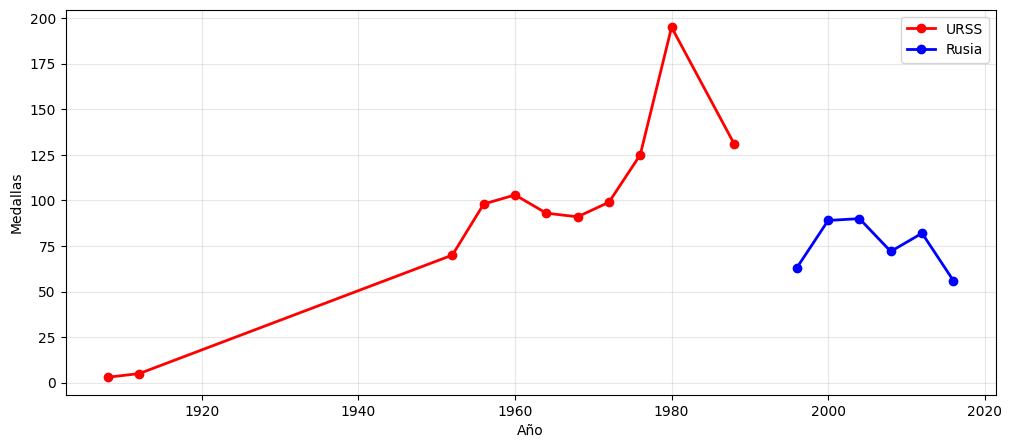

Promedio URSS: 92.1 medallas/año
Promedio Rusia: 75.3 medallas/año


In [149]:
urss_total = urss_data[urss_data["Medal"] != "NoM"].groupby("Year").size()
rusia_total = rus[rus["Medal"]!= "NoM"].groupby("Year").size()
plt.figure(figsize =(12,5))
plt.plot(urss_total.index,urss_total.values, marker = "o", label = "URSS", color = "red", linewidth = 2)
plt.plot(rusia_total.index, rusia_total.values, marker = "o", label = "Rusia", color = "blue", linewidth = 2)
plt.xlabel("Año")
plt.ylabel("Medallas")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calcular promedios
print(f"Promedio URSS: {urss_total.mean():.1f} medallas/año")
print(f"Promedio Rusia: {rusia_total.mean():.1f} medallas/año")

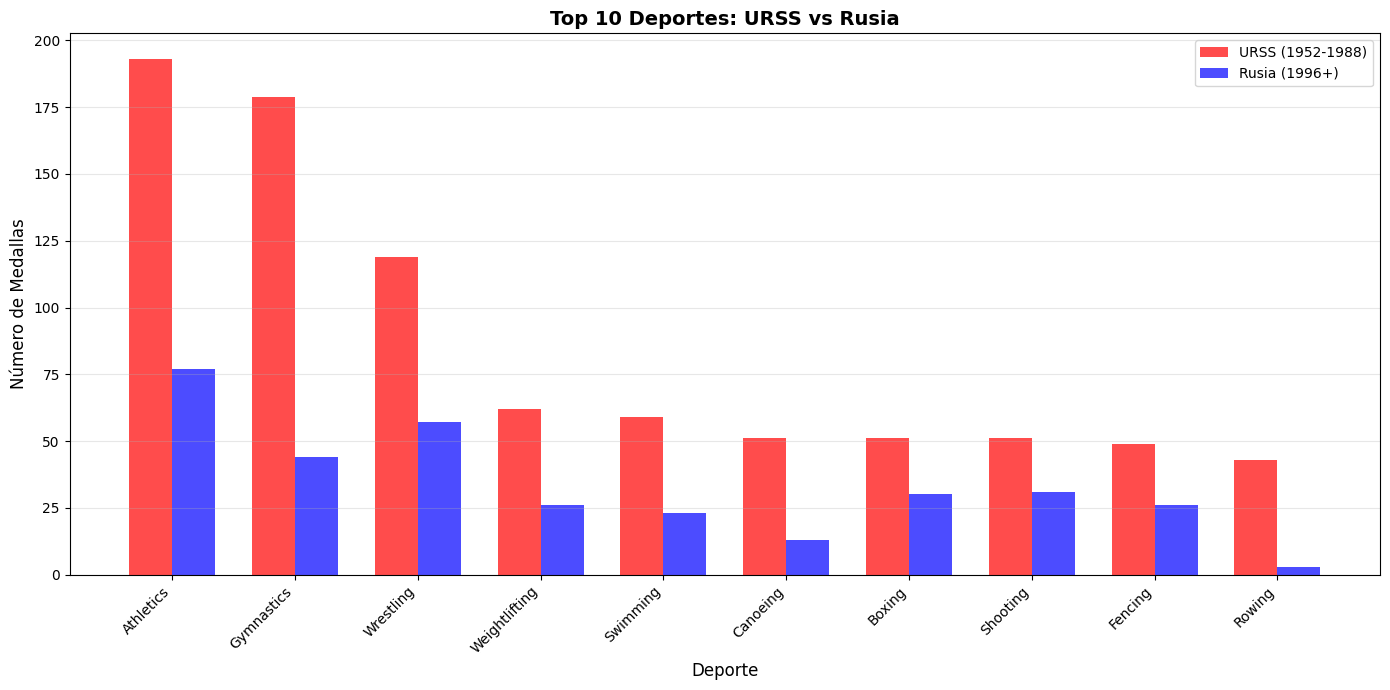

               URSS (1952-1988)  Rusia (1996+)
Athletics                   193             77
Gymnastics                  179             44
Wrestling                   119             57
Weightlifting                62             26
Swimming                     59             23
Canoeing                     51             13
Boxing                       51             30
Shooting                     51             31
Fencing                      49             26
Rowing                       43              3


In [ ]:
# URSS uso "Sport_x", Rusia uso "Sport"
urss_deportes_top = urss_data[urss_data["Medal"] != "NoM"].groupby("Sport_x").size().sort_values(ascending=False).head(10)

deportes_top = urss_deportes_top.index.tolist()

# Rusia uso "Sport" (sin _x)
rus_deportes_top = rus[
    (rus["Medal"] != "NoM") & 
    (rus["Sport"].isin(deportes_top))
].groupby("Sport").size()

rus_deportes_top = rus_deportes_top.reindex(deportes_top, fill_value=0)

# Crear comparación
comparacion = pd.DataFrame({
    'URSS (1952-1988)': urss_deportes_top,
    'Rusia (1996+)': rus_deportes_top
})

# HISTOGRAMA
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(comparacion.index))
ancho = 0.35

ax.bar(x - ancho/2, comparacion['URSS (1952-1988)'], ancho, 
       label='URSS (1952-1988)', color='red', alpha=0.7)
ax.bar(x + ancho/2, comparacion['Rusia (1996+)'], ancho, 
       label='Rusia (1996+)', color='blue', alpha=0.7)

ax.set_xlabel('Deporte', fontsize=12)
ax.set_ylabel('Número de Medallas', fontsize=12)
ax.set_title('Top 10 Deportes: URSS vs Rusia', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparacion.index, rotation=45, ha='right')
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(comparacion)

### Conclusiones

La disolución de la URSS destruyó una superpotencia deportiva que nunca se ha recuperado. 
Rusia heredó solo una fracción del talento, infraestructura y recursos del sistema soviético, y la crisis económica + sanciones de dopaje han impedido cualquier resurgimiento.
La diferencia de 100-150 medallas entre URSS y Rusia en deportes como Athletics y Gymnastics muestra que no era solo "Rusia" quien ganaba,
eran 15 repúblicas trabajando como una máquina de guerra deportiva estatal.

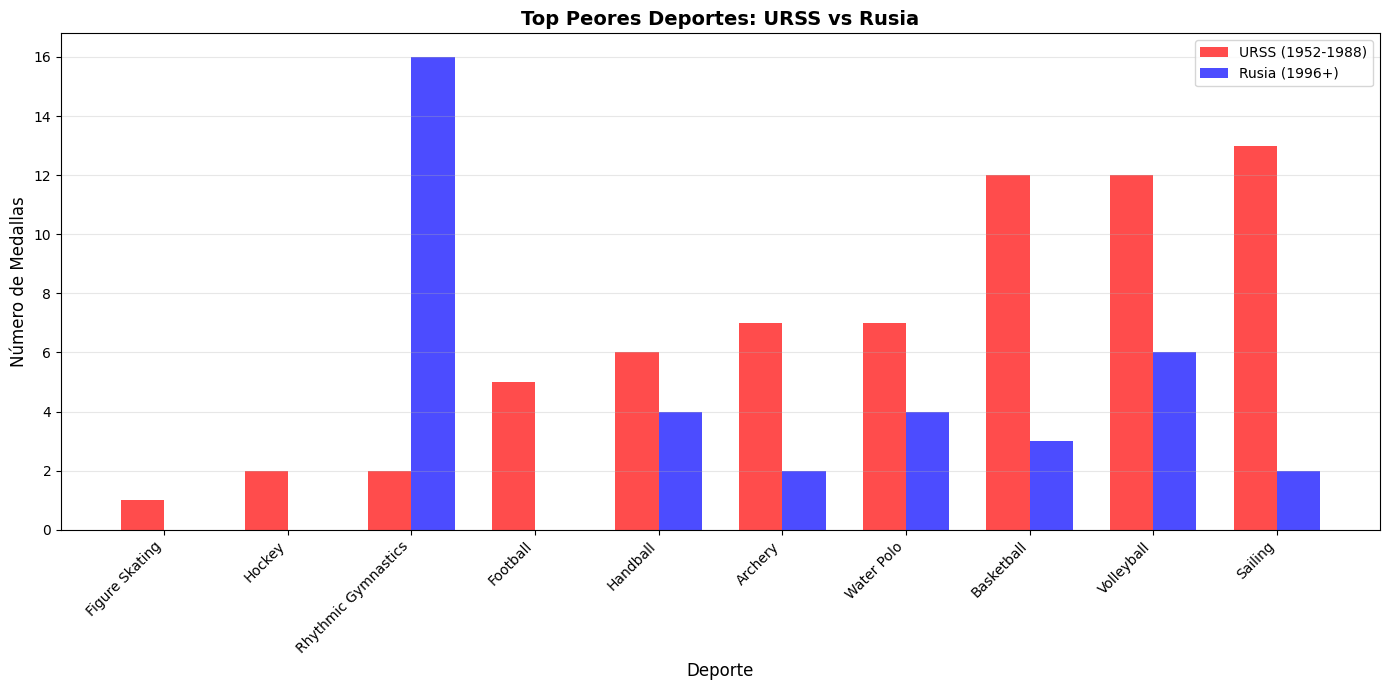

                     URSS (1952-1988)  Rusia (1996+)
Figure Skating                      1              0
Hockey                              2              0
Rhythmic Gymnastics                 2             16
Football                            5              0
Handball                            6              4
Archery                             7              2
Water Polo                          7              4
Basketball                         12              3
Volleyball                         12              6
Sailing                            13              2


In [173]:
urss_deportes_top = urss_data[urss_data["Medal"] != "NoM"].groupby("Sport_x").size().sort_values(ascending=True).head(10)

deportes_top = urss_deportes_top.index.tolist()

# Rusia uso "Sport" (sin _x)
rus_deportes_top = rus[
    (rus["Medal"] != "NoM") & 
    (rus["Sport"].isin(deportes_top))
].groupby("Sport").size()

rus_deportes_top = rus_deportes_top.reindex(deportes_top, fill_value=0)

# Crear comparación
comparacion = pd.DataFrame({
    'URSS (1952-1988)': urss_deportes_top,
    'Rusia (1996+)': rus_deportes_top
})

# HISTOGRAMA
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(comparacion.index))
ancho = 0.35

ax.bar(x - ancho/2, comparacion['URSS (1952-1988)'], ancho, 
       label='URSS (1952-1988)', color='red', alpha=0.7)
ax.bar(x + ancho/2, comparacion['Rusia (1996+)'], ancho, 
       label='Rusia (1996+)', color='blue', alpha=0.7)

ax.set_xlabel('Deporte', fontsize=12)
ax.set_ylabel('Número de Medallas', fontsize=12)
ax.set_title('Top Peores Deportes: URSS vs Rusia', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparacion.index, rotation=45, ha='right')
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(comparacion)

Incluso en los deportes que se les daba peor se nota esta caída de la que hablábamos anteriormente. Solamente en Gimnasia Rítmica Rusia supera en medallas y eso se debe a que es un deporte "moderno" agregado hace poco tiempo en los JJOO.

## Análisis Estados Unidos

#### Ránking de años con más medallas

In [180]:
usa_data = medals_tally[medals_tally["NOC"] == "USA"].copy()  # ← .copy() importante

# Contar medallas
medallas_por_año = usa_data[usa_data["Medal"] != "NoM"].groupby("Year").size().sort_values(ascending = False).head(10)
print(medallas_por_año)

Year
1904    230
1984    173
2016    121
1932    110
2008    110
1992    108
1968    107
2012    103
1996    101
2004    101
dtype: int64


#### Ránking de años con menos medallas

In [181]:
medallas_por_año = usa_data[usa_data["Medal"] != "NoM"].groupby("Year").size().sort_values(ascending = True).head(10)
print(medallas_por_año)

Year
1896    19
1906    23
1908    46
1900    54
1928    56
1936    57
1912    63
1960    71
1956    74
1952    76
dtype: int64


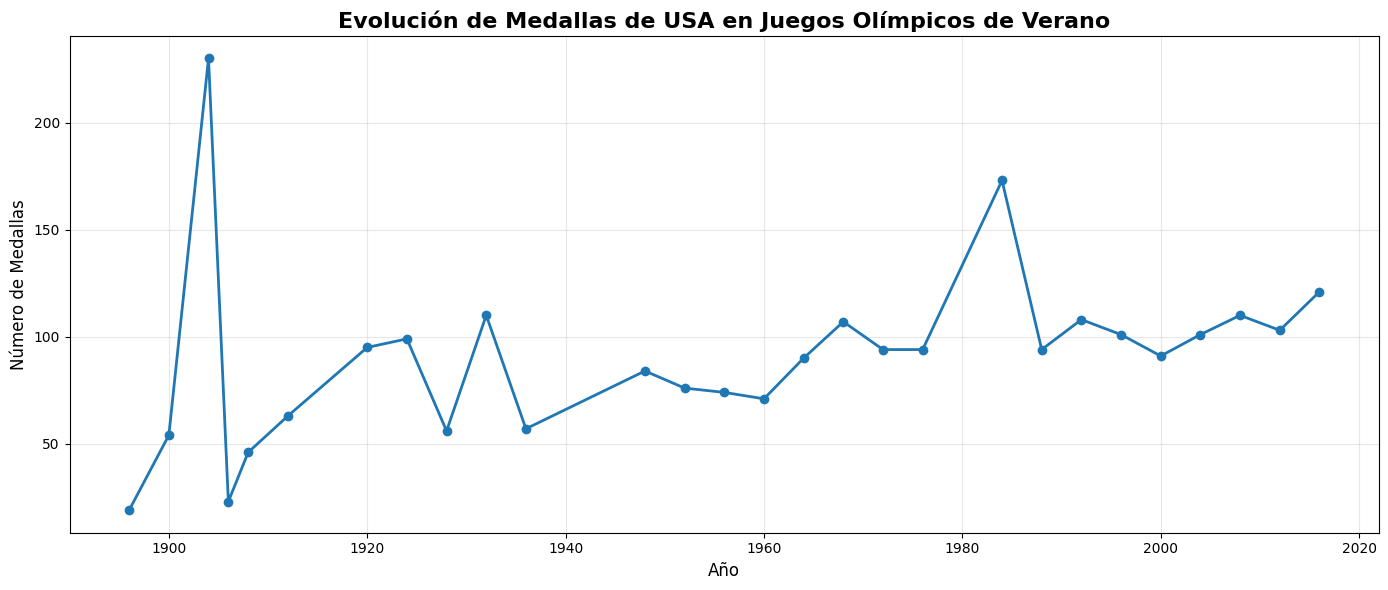

In [183]:
usa_medallas = usa_data.loc[usa_data['Medal'] != 'No Medal']

# Contar medallas por año
medallas_por_año = usa_medallas.groupby('Year').size()

# Gráfico de línea
plt.figure(figsize=(14, 6))
plt.plot(medallas_por_año.index, medallas_por_año.values, marker='o', linewidth=2, markersize=6)
plt.title('Evolución de Medallas de USA en Juegos Olímpicos de Verano', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Medallas', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Como pasó anteriormente con Rusia, la razón de que en 1984 ganaran tantas medallas fue por un boicot de países comunistas liderado por la URSS como venganza del boicot estadounidense de 1980.

URSS, Alemania Oriental, Polonia, Cuba, Bulgaria y Checoslovaquia fueron unos de los países ausentes de los juegos de Los Ángeles

## Comparación entre Estados Unidos y la URSS durante la Guerra Fría

      USA  URSS
Year           
1948   84     0
1952   76    70
1956   74    98
1960   71   103
1964   90    93
1968  107    91
1972   94    99
1976   94   125
1980    0   195
1984  173     0
1988   94   131


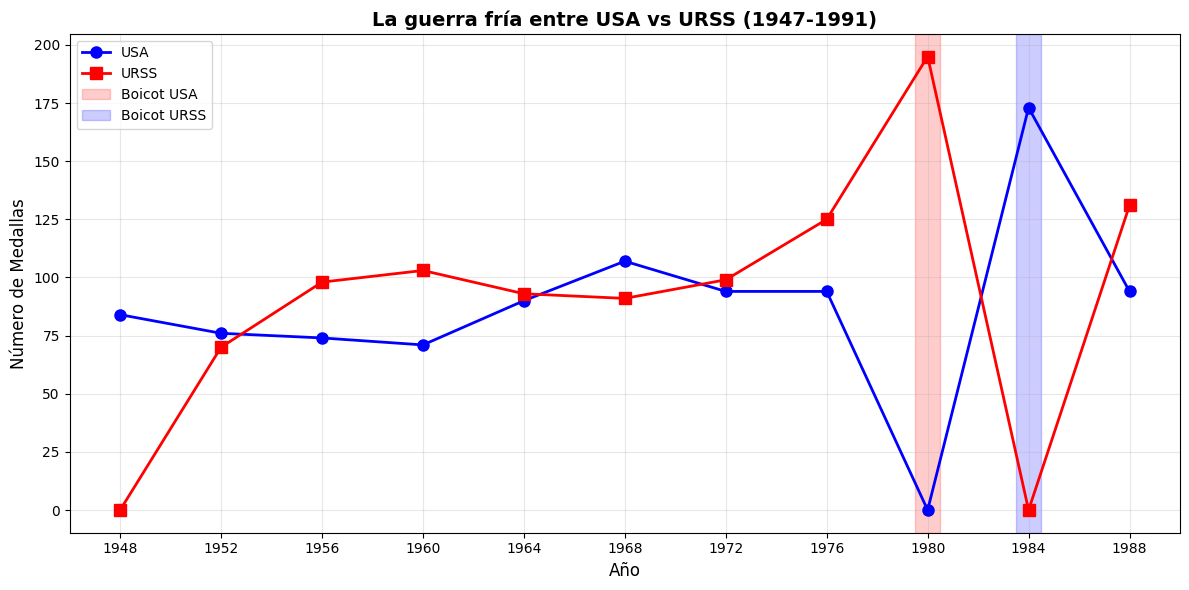

In [186]:
# Años de comparación
años_comparacion = [1948,1952,1956,1960,1964,1968,1972,1976, 1980, 1984, 1988]

# USA
usa_comparacion = usa_data[usa_data["Year"].isin(años_comparacion)]
medallas_usa_años = usa_comparacion[usa_comparacion["Medal"] != "NoM"].groupby("Year").size()

# URSS
urss_comparacion = urss_data[urss_data["Year"].isin(años_comparacion)]
medallas_urss_años = urss_comparacion[urss_comparacion["Medal"] != "NoM"].groupby("Year").size()

# DataFrame
df_comparacion = pd.DataFrame({
    'USA': medallas_usa_años,
    'URSS': medallas_urss_años
}).fillna(0).astype(int)

print(df_comparacion)

# GRÁFICO DE LÍNEAS
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_comparacion.index, df_comparacion['USA'], marker='o', 
        linewidth=2, markersize=8, label='USA', color='blue')
ax.plot(df_comparacion.index, df_comparacion['URSS'], marker='s', 
        linewidth=2, markersize=8, label='URSS', color='red')

# Marcar los boicots
ax.axvspan(1979.5, 1980.5, alpha=0.2, color='red', label='Boicot USA')
ax.axvspan(1983.5, 1984.5, alpha=0.2, color='blue', label='Boicot URSS')

ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Número de Medallas', fontsize=12)
ax.set_title('La guerra fría entre USA vs URSS (1947-1991)', fontsize=14, fontweight='bold')
ax.set_xticks([1948,1952,1956,1960,1964,1968,1972,1976, 1980, 1984, 1988])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [191]:
# Ver qué columnas tienes
print(usa_data.columns)

# Añadir Sport desde jjoo
sport_mapping = jjoo[["Event", "Sport"]].drop_duplicates()
usa_data = usa_data.merge(sport_mapping, on="Event", how="left")

# Verificar que ahora sí tiene Sport
print(usa_data.columns)


Index(['Year', 'Country', 'Event', 'Medal', 'atletas', 'Team_Event',
       'Medal_corrected', 'NOC'],
      dtype='object')
Index(['Year', 'Country', 'Event', 'Medal', 'atletas', 'Team_Event',
       'Medal_corrected', 'NOC', 'Sport'],
      dtype='object')


USA 1984 (sin URSS):
Sport
Athletics     40
Swimming      33
Gymnastics    16
Wrestling     13
Boxing        11
Cycling        9
Rowing         8
Diving         8
Sailing        7
Shooting       6
dtype: int64

URSS 1980 (sin USA):
Sport_x
Athletics        41
Swimming         22
Gymnastics       22
Wrestling        17
Rowing           12
Canoeing          8
Boxing            8
Weightlifting     8
Equestrianism     8
Fencing           8
dtype: int64


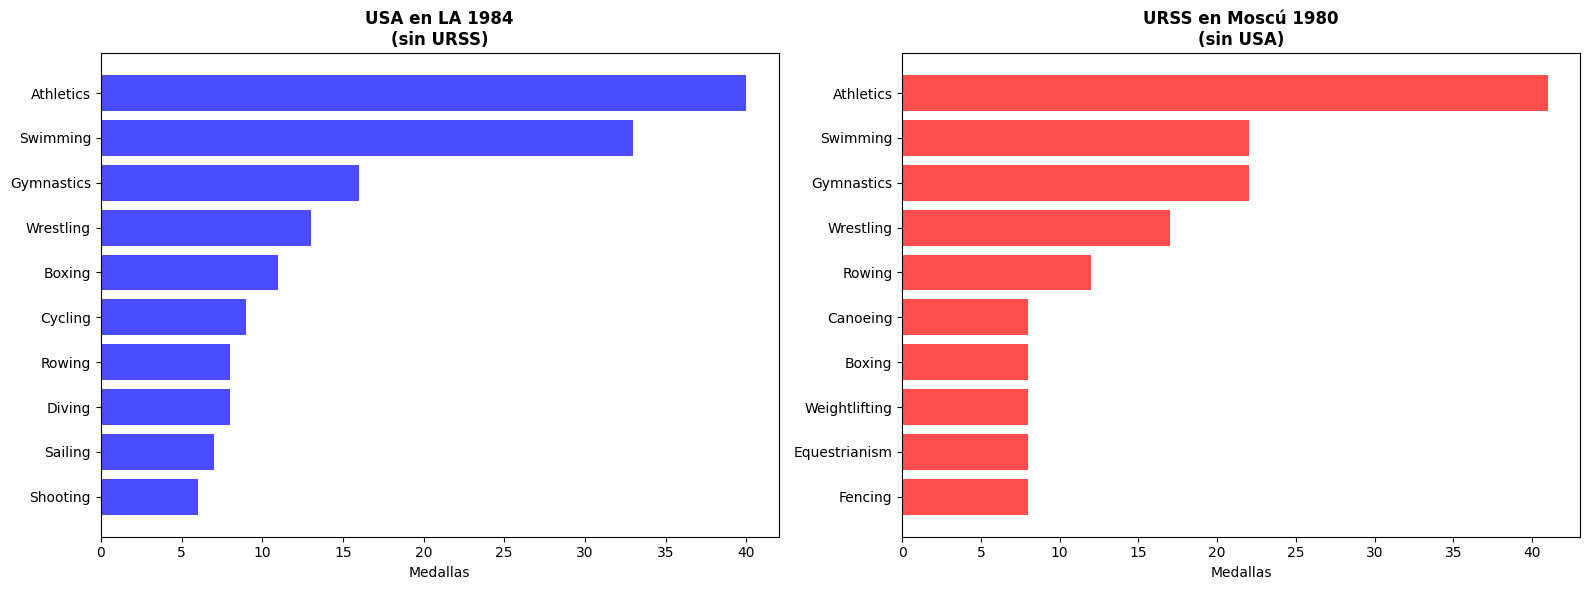

In [194]:
# Top deportes USA en 1984
usa_1984 = usa_data[(usa_data["Year"] == 1984) & (usa_data["Medal"] != "NoM")]
top_deportes_usa_1984 = usa_1984.groupby("Sport").size().sort_values(ascending=False).head(10)

# Top deportes URSS en 1980
urss_1980 = urss_data[(urss_data["Year"] == 1980) & (urss_data["Medal"] != "NoM")]
top_deportes_urss_1980 = urss_1980.groupby("Sport_x").size().sort_values(ascending=False).head(10)

print("USA 1984 (sin URSS):")
print(top_deportes_usa_1984)
print("\nURSS 1980 (sin USA):")
print(top_deportes_urss_1980)

# Gráfico comparativo lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# USA 1984
ax1.barh(range(len(top_deportes_usa_1984)), top_deportes_usa_1984.values, color='blue', alpha=0.7)
ax1.set_yticks(range(len(top_deportes_usa_1984)))
ax1.set_yticklabels(top_deportes_usa_1984.index)
ax1.set_xlabel('Medallas')
ax1.set_title('USA en LA 1984\n(sin URSS)', fontweight='bold')
ax1.invert_yaxis()

# URSS 1980
ax2.barh(range(len(top_deportes_urss_1980)), top_deportes_urss_1980.values, color='red', alpha=0.7)
ax2.set_yticks(range(len(top_deportes_urss_1980)))
ax2.set_yticklabels(top_deportes_urss_1980.index)
ax2.set_xlabel('Medallas')
ax2.set_title('URSS en Moscú 1980\n(sin USA)', fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

In [217]:
# Primero verifica qué columnas tiene usa_data
print(usa_data.columns)

Index(['Year', 'Country', 'Event', 'Medal', 'atletas', 'Team_Event',
       'Medal_corrected', 'NOC'],
      dtype='object')


Sport
Figure Skating    1
Lacrosse          1
Jeu De Paume      1
Ice Hockey        1
Hockey            2
Triathlon         2
Rugby             3
Baseball          3
Tug-Of-War        3
Roque             3
dtype: int64


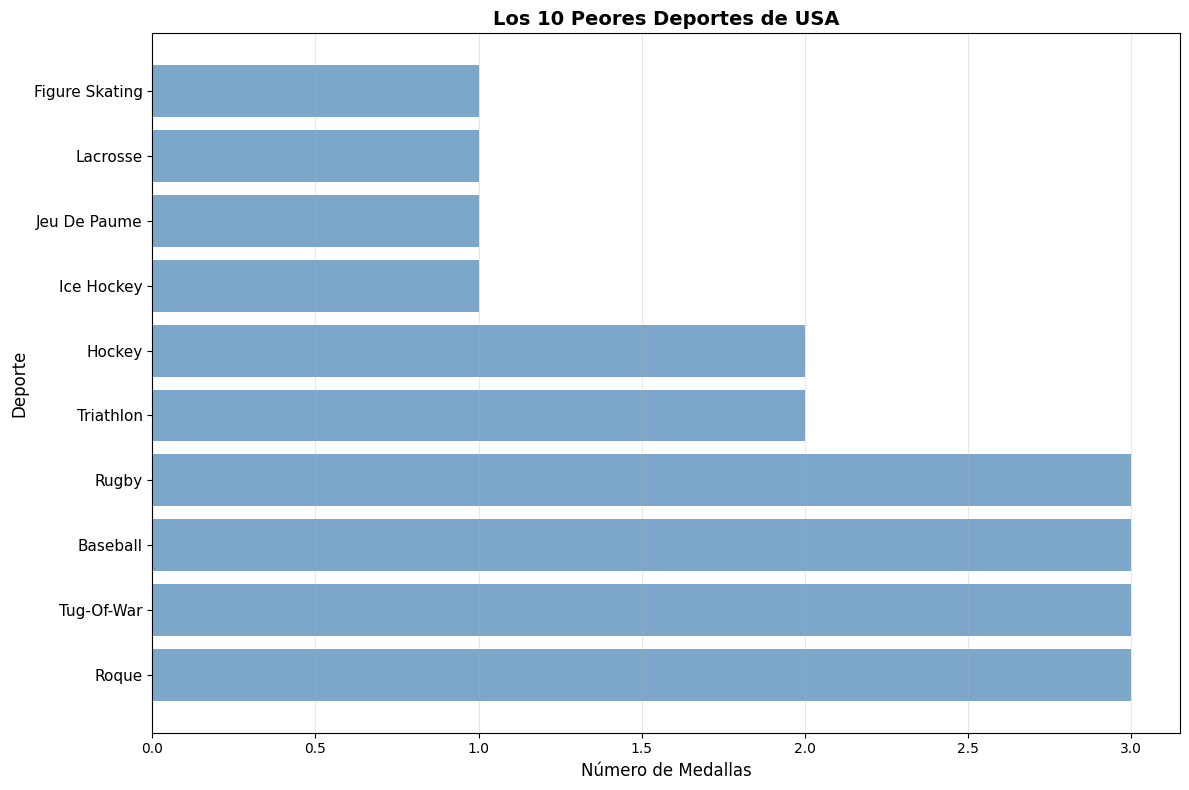

In [223]:
# 1. PRIMERO: Recrea usa_data correctamente
usa_data = medals_tally[medals_tally["NOC"] == "USA"] .copy()
usa_data = usa_data.merge(jjoo[["Event", "Sport"]].drop_duplicates(), on="Event", how="left")

# 2. AHORA SÍ: Filtra y agrupa (con PARÉNTESIS en groupby)
peores_deportes = usa_data[usa_data["Medal"] != "NoM"].groupby("Sport").size().sort_values(ascending=True).head(10)


print(peores_deportes)

# 3. Gráfico
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(range(len(peores_deportes)), peores_deportes.values, color='steelblue', alpha=0.7)
ax.set_yticks(range(len(peores_deportes)))
ax.set_yticklabels(peores_deportes.index, fontsize=11)
ax.set_xlabel('Número de Medallas', fontsize=12)
ax.set_ylabel('Deporte', fontsize=12)
ax.set_title('Los 10 Peores Deportes de USA', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [218]:
usa_data.columns

Index(['Year', 'Country', 'Event', 'Medal', 'atletas', 'Team_Event',
       'Medal_corrected', 'NOC'],
      dtype='object')

In [210]:
usa_data

0       True
1       True
2       True
3       True
4       True
        ... 
2539    True
2540    True
2541    True
2542    True
2543    True
Name: Medal, Length: 2544, dtype: bool

Sport
Athletics     816
Swimming      550
Diving        135
Wrestling     128
Gymnastics    113
Boxing        113
Shooting      110
Rowing         89
Sailing        61
Cycling        57
dtype: int64


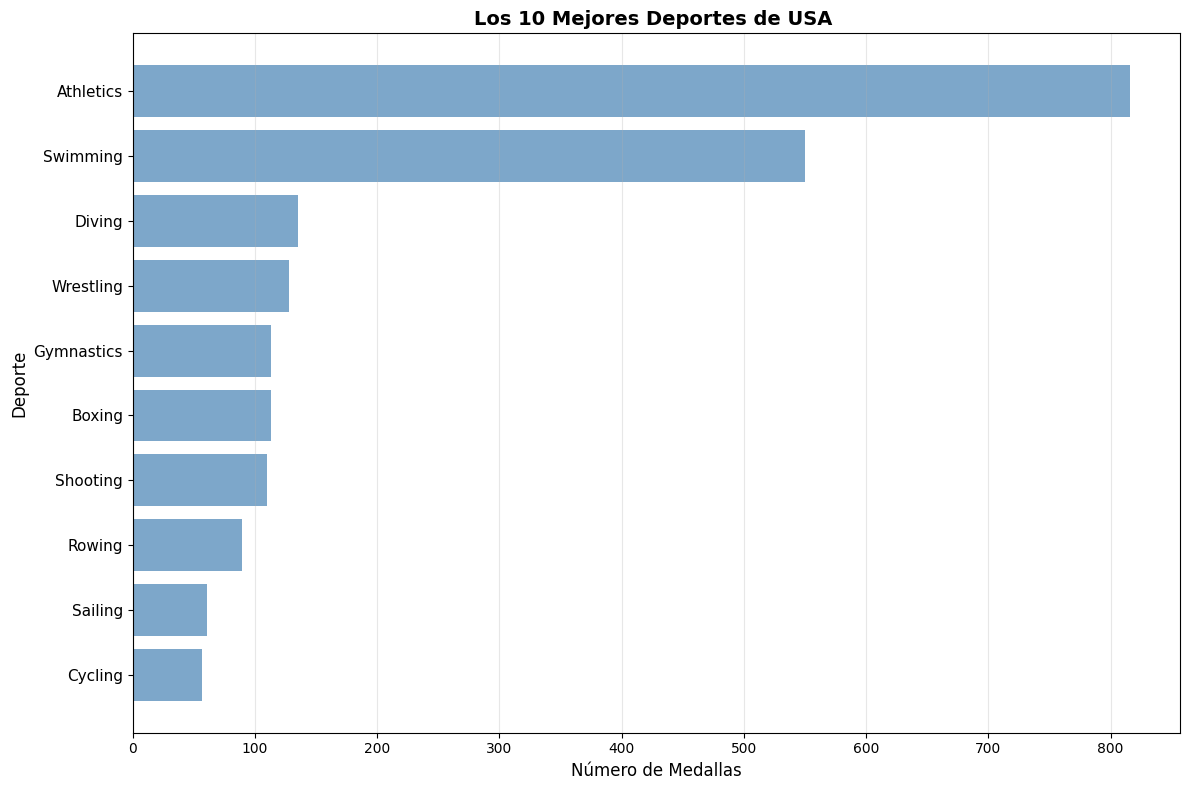

In [222]:
# 1. PRIMERO: Recrea usa_data correctamente
usa_data = medals_tally[medals_tally["NOC"] == "USA"] .copy()
usa_data = usa_data.merge(jjoo[["Event", "Sport"]].drop_duplicates(), on="Event", how="left")

# 2. AHORA SÍ: Filtra y agrupa (con PARÉNTESIS en groupby)
peores_deportes = usa_data[usa_data["Medal"] != "NoM"].groupby("Sport").size().sort_values(ascending=False).head(10)


print(peores_deportes)

# 3. Gráfico
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(range(len(peores_deportes)), peores_deportes.values, color='steelblue', alpha=0.7)
ax.set_yticks(range(len(peores_deportes)))
ax.set_yticklabels(peores_deportes.index, fontsize=11)
ax.set_xlabel('Número de Medallas', fontsize=12)
ax.set_ylabel('Deporte', fontsize=12)
ax.set_title('Los 10 Mejores Deportes de USA ', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()